In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

# Softmax Regression

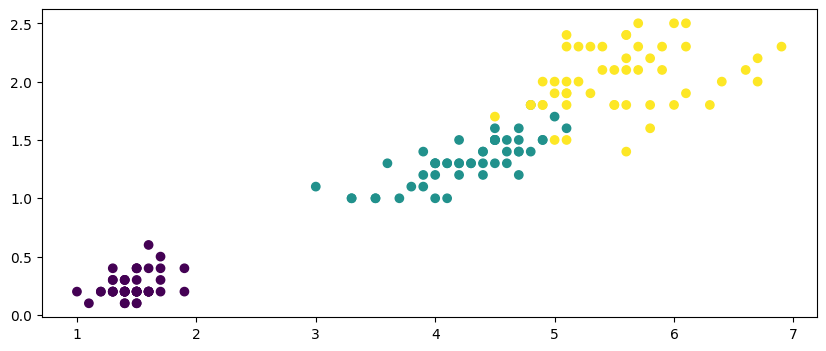

In [3]:
iris = datasets.load_iris()

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"] + 1

plt.figure(figsize=(10, 4))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Zad

wykonaj Softmax Regression

In [4]:
def plot_decision_boundary(model, X, y, do_pred_proba=True):
    x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    if do_pred_proba:
        y_proba = model.predict_proba(X_new)
        zz1 = y_proba[:, 1].reshape(x0.shape)

    y_predict = model.predict(X_new)

    zz = y_predict.reshape(x0.shape)

    plt.figure(figsize=(10, 4))
    plt.plot(X[y == 3, 0], X[y == 3, 1], "g^", label="Iris-Virginica")
    plt.plot(X[y == 2, 0], X[y == 2, 1], "bs", label="Iris-Versicolor")
    plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris-Setosa")

    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    if do_pred_proba:
        contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
        plt.clabel(contour, inline=1, fontsize=12)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="center left", fontsize=14)
    plt.show()


def my_plot_decision_regions(X, y, clf):
    plt.figure(figsize=(10, 4))
    plot_decision_regions(X, y, clf=clf)
    plt.xlabel('petal length [standardized]')
    plt.ylabel('petal width [standardized]')
    plt.legend(loc='upper left')
    plt.show()

In [5]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)  # "ovr"
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

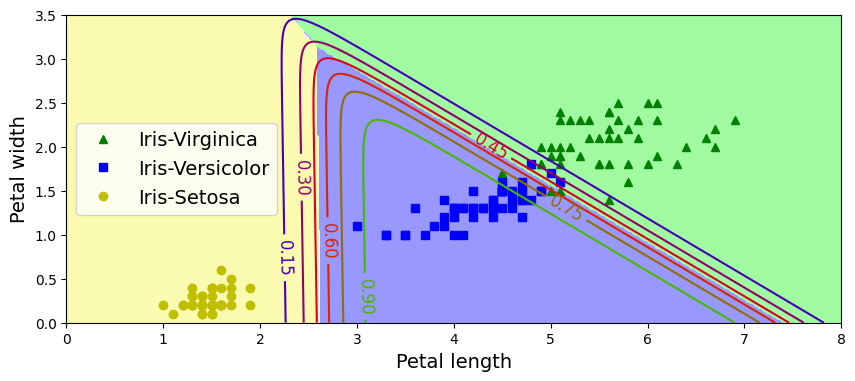

In [6]:
plot_decision_boundary(softmax_reg, X, y)

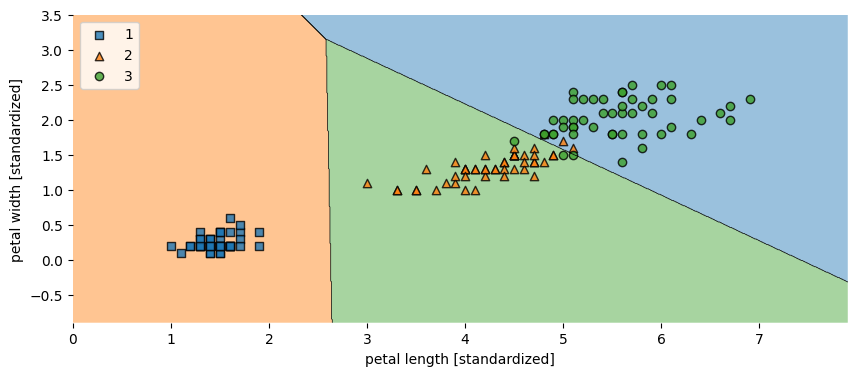

In [7]:
my_plot_decision_regions(X, y, softmax_reg)

# Zad

Wykonaj analogiczna zadanie za pomocą strategi 
* one-versus-all
* one-versus-one

In [8]:
one_versus_all = LogisticRegression(multi_class="ovr", solver="lbfgs", C=10, random_state=42)  # kaz
one_versus_all.fit(X, y)

LogisticRegression(C=10, multi_class='ovr', random_state=42)

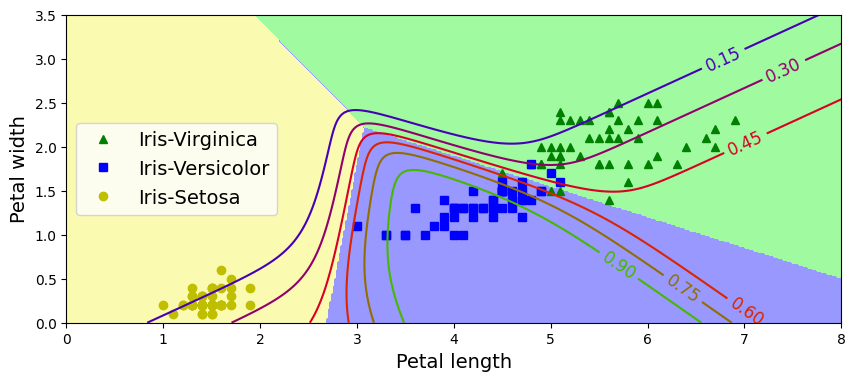

In [9]:
plot_decision_boundary(one_versus_all, X, y)

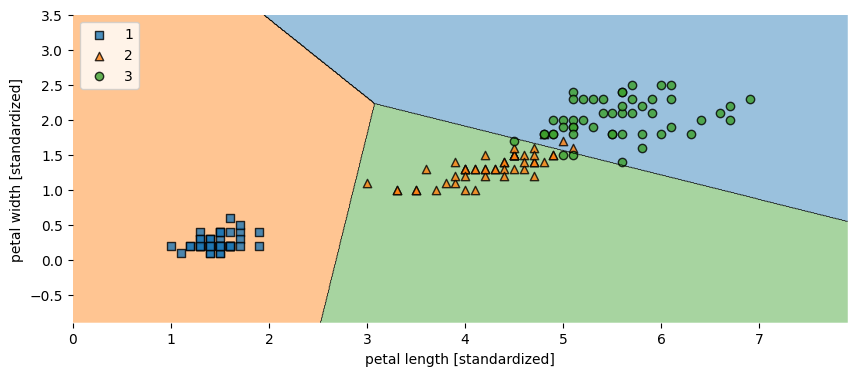

In [10]:
my_plot_decision_regions(X, y, clf=one_versus_all)

In [11]:
log_reg = LogisticRegression(solver="lbfgs", C=10, random_state=42)  #par
one_versus_one = OneVsOneClassifier(log_reg)
one_versus_one.fit(X, y)

OneVsOneClassifier(estimator=LogisticRegression(C=10, random_state=42))

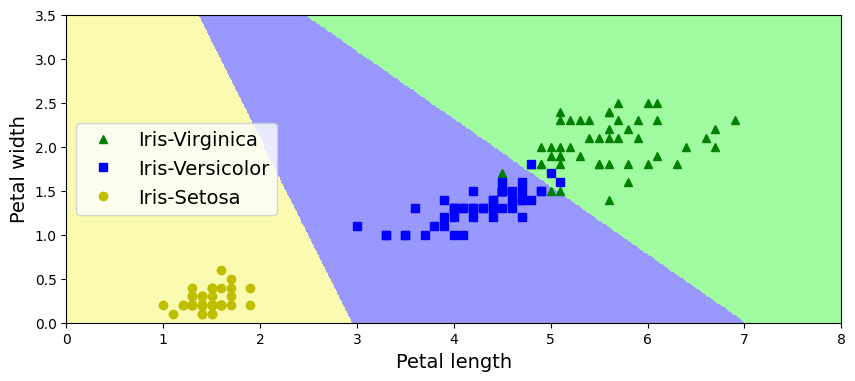

In [12]:
plot_decision_boundary(one_versus_one, X, y, False)

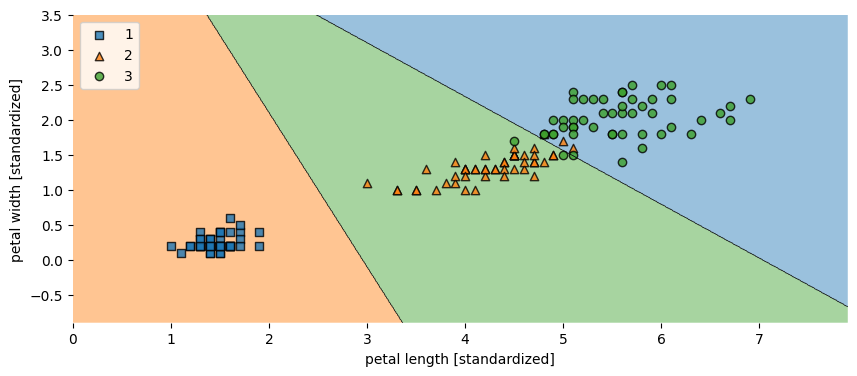

In [13]:
my_plot_decision_regions(X, y, clf=one_versus_one)